# Classification carotids

In [1]:
# Import modules
import pandas as pd
from math import sqrt
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import sklearn.impute
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import seaborn as sb
import statistics
import seaborn as sn
from sklearn.model_selection import StratifiedKFold
from collections import Counter
import sklearn.ensemble
from statistics import mean
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import pandas as pd
import scipy.stats as stats
import os

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import GridSearchCV, KFold,RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold,RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# from sksurv.linear_model import CoxnetSurvivalAnalysis
# from sksurv.metrics import concordance_index_censored
# from sksurv.util import Surv

In [2]:
main_path = os.getcwd()
dataset_path = os.path.join(main_path,'data_rad_clin_DEF.csv')
# Import data
features = pd.read_csv(dataset_path)
features = features.set_index('IDs_new')

# Display features table
display(features)

,ID,label,LATERALITY_0_RightSide_1_LeftSide_,SURGDATE,DOB,CTPRE,MRIPRE,reasonForSurgery,Sex_1_female_0_male_,AGEATSURGERY,...,waveletLLL_gldm_GrayLevelNonUniformity,waveletLLL_gldm_GrayLevelVariance,waveletLLL_gldm_HighGrayLevelEmphasis,waveletLLL_gldm_LargeDependenceEmphasis,waveletLLL_gldm_LargeDependenceHighGrayLevelEmphasis,waveletLLL_gldm_LargeDependenceLowGrayLevelEmphasis,waveletLLL_gldm_LowGrayLevelEmphasis,waveletLLL_gldm_SmallDependenceEmphasis,waveletLLL_gldm_SmallDependenceHighGrayLevelEmphasis,waveletLLL_gldm_SmallDependenceLowGrayLevelEmphasis
IDs_new,,,,,,,,,,,,,,,,,,,,,
patient_TC_5,5,0,0.0,12-feb-2013,15-ago-1927,03-Feb-2013,NaT,Stenosis >70%,1.0,85,...,11.445183,104.060684,337.003322,3.564784,868.617940,0.091933,0.023621,0.603856,229.142188,0.013972
patient_TC_12,12,1,0.0,14-giu-2013,17-ott-1952,13-Jun-2013,NaT,Aumarosis fugax,0.0,60,...,5.756757,106.429511,545.162162,2.459459,1248.364865,0.017139,0.011749,0.744229,415.707442,0.010835
patient_TC_15,15,1,1.0,23-lug-2013,2-gen-1946,17-Apr-2013,NaT,Stenosis >70%,0.0,67,...,11.041026,73.336384,212.697436,3.697436,562.010256,0.114223,0.029193,0.580093,146.649858,0.017988
patient_TC_16,16,0,1.0,27-ago-2013,4-giu-1950,15-Jul-2013,NaT,Significant stenosis,0.0,63,...,3.113208,43.819865,173.264151,2.660377,284.320755,0.154856,0.043526,0.732966,146.832547,0.032145
patient_TC_17,17,0,1.0,18-ott-2013,28-gen-1940,04-Oct-2013,NaT,Stenosis >70%,1.0,73,...,3.620690,483.352485,1411.710345,1.510345,1659.917241,0.016820,0.015117,0.880077,1351.873180,0.014718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient_TC_193,193,0,1.0,08-feb-2023,21-ago-1947,24-Nov-2022,NaT,"Restenosis after earlier CEA, significant sten...",0.0,75,...,4.604167,138.497287,574.697917,2.895833,1312.468750,0.022518,0.014894,0.694951,433.832321,0.013767
patient_TC_197,197,0,1.0,6-mar-2023,21-dic-1948,23-Dec-2022,NaT,Significant stenosis,0.0,74,...,6.704545,85.420681,493.414773,2.181818,840.789773,0.057582,0.015846,0.789970,423.891296,0.005951
patient_TC_199,199,1,1.0,10-mar-2023,11-ott-1944,08-Mar-2023,NaT,TIA/Stroke,0.0,78,...,6.055118,105.409759,450.433071,2.338583,809.251969,0.076373,0.021497,0.726597,376.056430,0.008085


# FUNZIONI UTILI

Remove correlated features
--> funzione che rimuove le features correlate

Viene richiamata la funzione Mean_off_diagonal -->  calcola la media della matrice di correlazione senza tener conto della diagonale su cui sono contenuti i valori di correlazione della variabile con se stessa

In [41]:
def mean_off_diagonal(corr_matrix):

  corr_matrix_off_diagonal = np.zeros((len(corr_matrix.columns),len(corr_matrix.columns)-1))
  row = -1
  for r in range (len(corr_matrix.columns)):
    row = row+1
    col = -1
    for c in range (len(corr_matrix.columns)):
      if (c != r):
        col = col+1
        corr_matrix_off_diagonal[row,col] = abs(corr_matrix.iloc[r,c])

  #mean_corr_matrix_off_diagonal = (corr_matrix_off_diagonal.sum(axis=1))/len(corr_matrix.columns)
  mean_corr_matrix_off_diagonal = (corr_matrix_off_diagonal.sum(axis=1))/(len(corr_matrix.columns)-1)

  return (mean_corr_matrix_off_diagonal)

In [42]:
def remove_correlated_features(data_train, data_val, data_test, thr):

  if (thr == 0):

    X_train = data_train.iloc[:,:-1]
    X_val = data_val.iloc[:,:-1]
    X_test = data_test.iloc[:,:-1]
    colnum = []
    corr_matrix = X_train.corr(method='spearman')

    data_train_copy = data_train
    data_val_copy = data_val
    data_test_copy = data_test
    num_corr_features = 0
    correlated_features_name = 0
    original_features = data_train_copy.columns[:-1]
    index_nc_features = data_train_copy.columns.get_indexer(original_features)

  else:

    X_train = data_train.iloc[:,:-1]
    X_val = data_val.iloc[:,:-1]
    X_test = data_test.iloc[:,:-1]
    colnum = []
    corr_matrix = X_train.corr(method='spearman')

  # Mean of off-diagonal correlation matrix
    mean_corr_matrix_off_diagonal = mean_off_diagonal(corr_matrix)

  # Compute correlation matrix on the dataset
    correlated_features = []  # List to keep track of the highly correlated features
    colnum = []
    for i in range(len(corr_matrix.columns)):
      for j in range(i):

        if abs(corr_matrix.iloc[i, j]) > thr:
          mean_i = mean_corr_matrix_off_diagonal[i]
          mean_j = mean_corr_matrix_off_diagonal[j]

          if j not in colnum:
            if (abs(mean_i)>abs(mean_j)):
              colname = corr_matrix.columns[i]
              colnum.append(i)
              correlated_features.append(colname)
              break
            else:
              colname = corr_matrix.columns[j]
              colnum.append(j)
              correlated_features.append(colname)

    #print ('Removing '+str(len(correlated_features))+' features')
    #print ('Remaining features: '+str(len(X_train.columns)-len(correlated_features))+' features')
    #print ('Features with correlation higher than :', thr*100,'%')
    #print (correlated_features)
    #print (colnum)

    correlated_features_name = [*set(correlated_features)]
    index_nc_features =  [*set(colnum)]

    X_train_copy = X_train.copy()
    X_train_copy = X_train_copy.drop(correlated_features_name, axis=1)

    X_val_copy = X_val.copy()
    X_val_copy = X_val_copy.drop(correlated_features_name, axis=1)

    X_test_copy = X_test.copy()
    X_test_copy = X_test_copy.drop(correlated_features_name, axis=1)

    num_corr_features = len(correlated_features_name)
    num_corr_features_idx = len(index_nc_features)

    data_train_copy = pd.concat([X_train_copy,data_train.iloc[:,[-1]]], axis=1)
    data_val_copy = pd.concat([X_val_copy,data_val.iloc[:,[-1]]], axis=1)
    data_test_copy = pd.concat([X_test_copy,data_test.iloc[:,[-1]]], axis=1)

  return data_train_copy,data_val_copy, data_test_copy, num_corr_features, correlated_features_name

Statistical test

Funzione che realizza il test statistico Mann Whitney e restituisce il dataset senza features non significative

In [43]:
#def mannwhitney(descriptor, verbose=False):
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy import stats
from scipy.stats import ranksums


def statistical_test(data_train, data_test, thr):

  features_ns = []
  features_significant = []

  each_celltype = data_train.columns[:-2]
  results = []
  for descriptor in each_celltype:
  # seed the random number generator
      seed(42)

  # ospedalizzato e non ospedalizzato
      selection = [descriptor, 'label'] # --> aggiornare il descriptor se il nome non è Labels
      df = data_train[selection]
      active = df[df.label == 1]
      active = active[descriptor]

      selection = [descriptor, 'label'] # --> aggiornare il descriptor se il nome non è Labels
      df = data_train[selection]
      inactive = df[df.label == 0]
      inactive = inactive[descriptor]

  # compare samples
      stat, p = mannwhitneyu(active, inactive)
    #print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
      alpha = thr
      if p > alpha:
          #interpretation = 'Same distribution (fail to reject H0)'
          features_ns.append(descriptor)
      else:
          #interpretation = 'Different distribution (reject H0)'
          features_significant.append(descriptor)

  data_train_copy = data_train.copy()
  data_train_copy = data_train_copy.drop(features_ns, axis=1)
  num_significant_features = len(data_train_copy.columns[:-1])
  percentage_selected_features = (num_significant_features/len(each_celltype))*100

  data_test_copy = data_test.copy()
  data_test_copy = data_test_copy.drop(features_ns, axis=1)




      #results.append([descriptor,stat,p,alpha,interpretation])

  #results_df = pd.DataFrame(results, columns=["Descriptor", "Statistics", "p", "alpha","Interpretation"])
  #results_df.sort_values(by="p", ascending=True, inplace=True)
  #results_df.reset_index(inplace=True)
  #filename = 'mannwhitneyu_'  + '.csv'
  #results_df.to_csv(filename)

  return data_train_copy, data_test_copy, num_significant_features, percentage_selected_features, features_significant

LASSO selection

Funzione che realizza la lasso regression per features selection e restituisce il dataset formato dalle sole features i cui coefficienti calcolati con lasso regression risultano diversi da 0

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso


#GridSearch per trovare il parametro alpha della lasso migliore in un array da 0.01 a 10 con passo 0.01
#GridSearch con CV su TRAIN+VALIDATION

def lasso_selection(data_train, data_test):

  lasso = Lasso()

  X_data_train = data_train.iloc[:,:-1] #dataset di features
  y_data_train = data_train.iloc[:,-1] # --> mettere la colonna relativa al time_to_event (target: time_to_event o event)
  features = X_data_train.columns

  X_data_test = data_test.iloc[:,:-1]
  y_data_test = data_test.iloc[:,-1] # --> mettere la colonna relativa al time_to_event


  cv=RepeatedKFold(n_splits=3,n_repeats=3, random_state=42)
  model_search = LassoCV(alphas=np.logspace(-8, -1, 100),max_iter=10**7,cv=cv, random_state=42) #since there is the possibility of not convergence we change the cv
    

  #model_search = GridSearchCV(lasso, {'alpha':np.arange(0.01,1,0.01)}, cv = 12, scoring="neg_mean_squared_error",verbose=1)

  model_search.fit(X_data_train, y_data_train)
  #alpha = model_search.best_params_['alpha']

  alpha = model_search.alpha_
  print("first best alpha:", alpha)
  lasso_best = Lasso(alpha, max_iter=10000)

  #lasso_best = Lasso(alpha=1, max_iter=10000)

  lasso_best.fit(X_data_train, y_data_train)

  #Troviamo i coefficienti corrispondenti a ogni feature
  coefficients = lasso_best.coef_
  importance = np.abs(coefficients)
  feat_lasso = np.array(features)[importance > 0]
  features_lasso = feat_lasso.flatten()

  X_data_train_lasso = X_data_train[features_lasso]
  index_features_selected_lasso = X_data_train.columns.get_indexer(features_lasso)
  X_data_test_lasso = X_data_test[features_lasso]
  num_selected_features_lasso = len(features_lasso)


  #Prendo gli indici delle fetaures rimaste dopo la lasso
  colname_sorted_lasso = X_data_train_lasso.columns

  data_train_lasso = pd.concat([X_data_train_lasso,data_train.iloc[:,[-1]]], axis=1)
  data_test_lasso = pd.concat([X_data_test_lasso,data_test.iloc[:,[-1]]], axis=1)

  return data_train_lasso, data_test_lasso, num_selected_features_lasso, index_features_selected_lasso

MRMR

In [45]:
import mrmr
from mrmr import mrmr_classif
from sklearn.datasets import make_classification

def mrmr_features_selection(data_train, data_test, k):

    X_train_data = data_train.iloc[:,:-1]
    X_test_data = data_test.iloc[:,:-1]
    y_train_data = data_train.iloc[:,-1] # --> eventualmente provare anche -2


    # use mrmr classification
    selected_features = mrmr_classif(X_train_data, y_train_data, K = k, return_scores=False, n_jobs=1, show_progress=True)

    X_data_train_mrmr = X_train_data.loc[:,selected_features]
    X_data_test_mrmr = X_test_data.loc[:,selected_features]

    data_train_mrmr = pd.concat([X_data_train_mrmr, data_train.iloc[:,[-1]]], axis=1)
    data_test_mrmr = pd.concat([X_data_test_mrmr, data_test.iloc[:,[-1]]], axis=1)

    return data_train_mrmr, data_test_mrmr


## compute metrics

In [46]:
def compute_metrics_classif(ytest, ypred, prob):
# Balanced accuracy
    bal_acc=balanced_accuracy_score(ytest,ypred)
    f1=f1_score(ytest,ypred)
    sensitivity= recall_score(ytest, ypred)
    cm = confusion_matrix(ytest, ypred)

    # Extract true negatives and false positives from confusion matrix
    tn = cm[0, 0]
    fp = cm[0, 1]
    specificity= tn / (tn + fp)

    fpr, tpr, threshold = metrics.roc_curve(ytest, prob, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    return bal_acc, f1, sensitivity, specificity, auc

## Decision tree

In [47]:
def dtree_classif(xtrain, ytrain, xtest, ytest):
    ytest_tree=[]
    ypred_tree=[]

    # train model
    param_grid = {'criterion': ['entropy','gini'],
            "max_depth": np.arange(2,10),
            "min_samples_split": np.arange(2,8),
            "min_samples_leaf": np.arange(2,8)}

    mdl= DecisionTreeClassifier(random_state=42)

    grid_search = GridSearchCV(mdl, param_grid,cv=5 )

    grid_search.fit(xtrain, ytrain)
    best_model_tree = grid_search.best_estimator_
    best_score_tree= grid_search.best_score_


    ypred   = best_model_tree.predict(xtest)
    ytest_tree  = np.concatenate((ytest_tree, ytest), axis=0)
    ypred_tree  = np.concatenate((ypred_tree, ypred), axis=0)
    prob_tree = best_model_tree.predict_proba(xtest)[:,1]
    
    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_tree, ypred_tree, prob_tree)

    return bal_acc, f1, sensitivity, specificity, auc

## KNN

In [48]:
def knn_classif(xtrain, ytrain, xtest, ytest):
    ytest_knn=[]
    ypred_knn=[]


    # train model
    param_grid = {'n_neighbors':np.arange(3,20)}
    mdl= KNN()

    grid_search = GridSearchCV(mdl, param_grid,cv=5 )

    grid_search.fit(xtrain, ytrain)
    best_model_knn = grid_search.best_estimator_
    best_score_knn= grid_search.best_score_


    ypred   = best_model_knn.predict(xtest)
    ytest_knn  = np.concatenate((ytest_knn, ytest), axis=0)
    ypred_knn  = np.concatenate((ypred_knn, ypred), axis=0)
    prob_knn = best_model_knn.predict_proba(xtest)[:,1]
    
    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_knn, ypred_knn, prob_knn)

    return bal_acc, f1, sensitivity, specificity, auc

## Logistic Regression

In [49]:
def lr_classif(xtrain, ytrain, xtest, ytest):
    ytest_lr=[]
    ypred_lr=[]

    # train model
    param_grid = {"C":[1e-2,0.1,1],
                "solver": ['liblinear','lbfgs'],
                "max_iter":[50,100,200,500]}

    mdl= LogisticRegression(random_state=42)

    grid_search = GridSearchCV(mdl, param_grid,cv=5 )

    grid_search.fit(xtrain, ytrain)
    best_model_lr = grid_search.best_estimator_
    best_score_lr= grid_search.best_score_

    ypred   = best_model_lr.predict(xtest)
    ytest_lr  = np.concatenate((ytest_lr, ytest), axis=0)
    ypred_lr  = np.concatenate((ypred_lr, ypred), axis=0)
    prob_lr = best_model_lr.predict_proba(xtest)[:,1]
    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_lr, ypred_lr, prob_lr)

    return bal_acc, f1, sensitivity, specificity, auc


## SVC

In [50]:
def svc_classif(xtrain, ytrain, xtest, ytest):
    ytest_svc=[]
    ypred_svc=[]

    # train model
    param_grid =  {"kernel":['linear'],
                "degree":[2,3,4,5,6,7,8],
                "C":[1,10,100]}

    mdl= SVC(probability=True, random_state=42)

    grid_search = GridSearchCV(mdl, param_grid,cv=5 )

    grid_search.fit(xtrain, ytrain)
    best_model_svc = grid_search.best_estimator_
    best_score_svc= grid_search.best_score_

    ypred   = best_model_svc.predict(xtest)
    ytest_svc  = np.concatenate((ytest_svc, ytest), axis=0)
    ypred_svc  = np.concatenate((ypred_svc, ypred), axis=0)
    prob_svc = best_model_svc.predict_proba(xtest)[:,1]

    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_svc, ypred_svc, prob_svc)
    return bal_acc, f1, sensitivity, specificity, auc


## MLP

In [51]:
def mlp_classif(xtrain, ytrain, xtest, ytest):
    ytest_mlp=[]
    ypred_mlp=[]

    # train model
    param_grid = {'hidden_layer_sizes':[(5,3), (7,3,3), (3,2,2)],
                'max_iter': [5000],
                'activation': ['tanh', 'relu'],
                'solver': ['sgd', 'adam'],
                'alpha': [0.01,1]}

    mdl = MLPClassifier(random_state=42)

    grid_search = GridSearchCV(mdl, param_grid,cv=5 )

    grid_search.fit(xtrain, ytrain)
    best_model_mlp = grid_search.best_estimator_
    best_score_mlp= grid_search.best_score_

    ypred   = best_model_mlp.predict(xtest)
    ytest_mlp  = np.concatenate((ytest_mlp, ytest), axis=0)
    ypred_mlp  = np.concatenate((ypred_mlp, ypred), axis=0)
    prob_mlp = best_model_mlp.predict_proba(xtest)[:,1]

    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_mlp, ypred_mlp, prob_mlp)
    return bal_acc, f1, sensitivity, specificity, auc


## Random Forest

In [52]:
def rf_classif(xtrain, ytrain, xtest, ytest):
    ytest_rf=[]
    ypred_rf=[]

    # train model
    param_grid = {'n_estimators' : [50, 100, 200], #low numbers to large one
                'criterion' : ['entropy', 'gini'],
                'max_depth' : [1,2,3,4],
                'min_samples_split' : [4,5,10],
                'min_samples_leaf' : [4,5,10]}

    mdl= RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(mdl, param_grid,cv=5 )

    grid_search.fit(xtrain, ytrain)
    best_model_rf  = grid_search.best_estimator_
    best_score_rf = grid_search.best_score_

    ypred   = best_model_rf .predict(xtest)
    ytest_rf   = np.concatenate((ytest_rf , ytest), axis=0)
    ypred_rf   = np.concatenate((ypred_rf , ypred), axis=0)
    prob_rf = best_model_rf .predict_proba(xtest)[:,1]
    
    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_rf, ypred_rf, prob_rf)
    return bal_acc, f1, sensitivity, specificity, auc




## Adaboost

In [53]:
def ada_classif(xtrain, ytrain, xtest, ytest):
    ytest_ada=[]
    ypred_ada=[]

    # train model
    param_grid = {'n_estimators' : [50, 100,500],
                'learning_rate' : [0.01, 0.1, 1,10]}

    mdl = AdaBoostClassifier(random_state=42)

    grid_search = GridSearchCV(mdl, param_grid,cv=5 )

    grid_search.fit(xtrain, ytrain)
    best_model_ada  = grid_search.best_estimator_
    best_score_ada = grid_search.best_score_

    ypred   = best_model_ada.predict(xtest)
    ytest_ada   = np.concatenate((ytest_ada , ytest), axis=0)
    ypred_ada   = np.concatenate((ypred_ada , ypred), axis=0)
    prob_ada = best_model_ada.predict_proba(xtest)[:,1]

    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_ada, ypred_ada, prob_ada)
    return bal_acc, f1, sensitivity, specificity, auc

## Naive Bayes

In [54]:
def nb_classif(xtrain, ytrain, xtest, ytest):
    ytest_nb=[]
    ypred_nb=[]

    # train model
    model= GaussianNB()
    best_model_nb=model.fit(xtrain, ytrain)

    ypred   = best_model_nb.predict(xtest)
    ytest_nb = np.concatenate((ytest_nb , ytest), axis=0)
    ypred_nb = np.concatenate((ypred_nb , ypred), axis=0)
    prob_nb = best_model_nb.predict_proba(xtest)[:,1]

    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_nb, ypred_nb, prob_nb)
    return bal_acc, f1, sensitivity, specificity, auc

## XGB

In [55]:
def xgb_classif(xtrain, ytrain, xtest, ytest):
    ytest_xgb=[]
    ypred_xgb=[]

    # train model
    param_grid =  {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
    mdl= XGBClassifier(random_state=42)

    grid_search = GridSearchCV(mdl, param_grid,cv=5 )

    grid_search.fit(xtrain, ytrain)
    best_model_xgb  = grid_search.best_estimator_
    best_score_xgb = grid_search.best_score_

    ypred   = best_model_xgb.predict(xtest)
    ytest_xgb = np.concatenate((ytest_xgb , ytest), axis=0)
    ypred_xgb = np.concatenate((ypred_xgb , ypred), axis=0)
    prob_xgb = best_model_xgb.predict_proba(xtest)[:,1]

    bal_acc, f1, sensitivity, specificity, auc = compute_metrics_classif(ytest_xgb, ypred_xgb, prob_xgb)
    return bal_acc, f1, sensitivity, specificity, auc

# MRMR

Dataset Creation

In [56]:
y = features.label
X = features.iloc[:, 20:]

Train-Test splitting

MRMR


In [57]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
insight_val = []
insight_test = []
for rand_num in range(0,8,1): 
    # Train - test splitting (80-20)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, shuffle=False, random_state=None, stratify=None)
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.15, shuffle=True, random_state=rand_num, stratify=y_train1)

    # Merging X and y for train and test set
    data_train = pd.concat([(pd.DataFrame(X_train.reset_index(drop=True))),(pd.DataFrame(y_train.reset_index(drop=True)))], axis=1)
    data_val = pd.concat([(pd.DataFrame(X_val.reset_index(drop=True))),(pd.DataFrame(y_val.reset_index(drop=True)))], axis=1)
    data_test = pd.concat([(pd.DataFrame(X_test1.reset_index(drop=True))),(pd.DataFrame(y_test1.reset_index(drop=True)))], axis=1)

    # Remove correlated features
    data_train_nc, data_val_nc, data_test_nc, num_corr_features, correlated_features = remove_correlated_features(data_train, data_val, data_test, 0.90) # da provare con diversi threshold di correlazione tra 0.80 e 0.95

    data_train=data_train_nc
    data_val=data_val_nc
    data_train_all=pd.concat([data_train_nc,data_val_nc], ignore_index=True)
    data_test=data_test_nc

    # Scaler1
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(data_train.iloc[:,:-1])
    tmp_scaled_train = pd.DataFrame(scaled_train,columns = data_train.columns[:-1])
    data_train_scaled = pd.concat([tmp_scaled_train,data_train.iloc[:,[-1]].reset_index(drop=True)], axis=1)

    scaled_val = scaler.transform(data_val.iloc[:,:-1])
    tmp_scaled_val = pd.DataFrame(scaled_val, columns=data_val.columns[:-1])
    data_val_scaled = pd.concat([tmp_scaled_val, data_val.iloc[:,[-1]].reset_index(drop=True)], axis=1)

    # Scaler2
    scaler2 = StandardScaler()
    scaled_train_all = scaler2.fit_transform(data_train_all.iloc[:,:-1])
    tmp_scaled_train_all = pd.DataFrame(scaled_train_all,columns = data_train_all.columns[:-1])
    data_train_scaled_all = pd.concat([tmp_scaled_train_all,data_train_all.iloc[:,[-1]].reset_index(drop=True)], axis=1)

    scaled_test = scaler2.transform(data_test.iloc[:,:-1])
    tmp_scaled_test = pd.DataFrame(scaled_test, columns=data_test.columns[:-1])
    data_test_scaled = pd.concat([tmp_scaled_test, data_test.iloc[:,[-1]].reset_index(drop=True)], axis=1)

    # Initialize lists to store AUC and Bal_Acc for each classifier
    auc_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
                'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

    bal_acc_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
                    'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

    f1_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
                'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

    sensitivity_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
                    'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

    specificity_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
                    'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

    for num_feat in range(2,31,1): 
        AUC_ROC = []
        bal_acc = []
        f1 = []                    

        # Features selection: MRMR
        data_train_mrmr, data_val_mrmr = mrmr_features_selection(data_train_scaled, data_val_scaled, num_feat) # Select number of features to get
        data_test_mrmr = data_test_scaled.loc[:,data_train_mrmr.columns]
        data_train_mrmr_all = data_train_scaled_all.loc[:,data_train_mrmr.columns]

        features_mrmr = data_train_mrmr.columns[:-1]

        # X-y dataset 
        X_train_2 = data_train_mrmr.drop(['label'], axis=1)
        X_val_2 = data_val_mrmr.drop(['label'], axis=1)
        X_test_2 = data_test_mrmr.drop(['label'], axis=1)
        X_train_all=data_train_mrmr_all.drop(['label'], axis=1)

        y_train_2 = data_train_mrmr[['label']]
        y_val_2 = data_val_mrmr[['label']]
        y_test_2 = data_test_mrmr[['label']]
        y_train_all = data_train_mrmr_all[['label']]

        # Oversampling minority class using SMOTE technique
        sm = SMOTE(sampling_strategy='minority',k_neighbors=1,random_state=42)
        xtrain, ytrain = sm.fit_resample(X_train_2, y_train_2)
        xval=X_val_2
        yval=y_val_2.label
        xtest=X_test_2
        ytest=y_test_2.label
       

        # Oversampling minority class using SMOTE technique
        sm2 = SMOTE(sampling_strategy='minority',k_neighbors=1,random_state=42)
        xtrain_all, ytrain_all = sm2.fit_resample(X_train_all, y_train_all)
        ytrain_all=ytrain_all.label

        # Collect AUC and Bal_Acc for each classifier
        classifiers = [('XGB', xgb_classif)]
        for classifier_name, classifier_func in classifiers:
            bal_acc_value_val, f1_value_val, sensitivity_value_val, specificity_value_val, auc_value_val = classifier_func(xtrain, ytrain, xval, yval)
            bal_acc_value_test, f1_value_test, sensitivity_value_test, specificity_value_test, auc_value_test = classifier_func(xtrain_all, ytrain_all, xtest, ytest)

            insight_val.append([rand_num, num_feat, classifier_name, auc_value_val, bal_acc_value_val, f1_value_val, sensitivity_value_val, specificity_value_val])
            insight_test.append([rand_num, num_feat, classifier_name, auc_value_test, bal_acc_value_test, f1_value_test, sensitivity_value_test, specificity_value_test])


insight_df_val = pd.DataFrame(insight_val, columns=["seed", "n features", "Classifier", "AUC_ROC", "bal_acc", "f1_score", "sensitivity", "specificity"])
insight_df_test = pd.DataFrame(insight_test, columns=["seed", "n features", "Classifier", "AUC_ROC", "bal_acc", "f1_score", "sensitivity", "specificity"])

100%|██████████| 30/30 [00:02<00:00, 12.11it/s]


In [58]:
insight_df_val

,seed,n features,Classifier,AUC_ROC,bal_acc,f1_score,sensitivity,specificity
0,0,2,XGB,0.541667,0.479167,0.363636,0.333333,0.625
1,0,3,XGB,0.614583,0.625000,0.545455,0.500000,0.750
2,0,4,XGB,0.687500,0.687500,0.600000,0.500000,0.875
3,0,5,XGB,0.708333,0.750000,0.666667,0.500000,1.000
4,0,6,XGB,0.708333,0.770833,0.727273,0.666667,0.875
...,...,...,...,...,...,...,...,...
227,7,26,XGB,0.520833,0.479167,0.363636,0.333333,0.625
228,7,27,XGB,0.416667,0.583333,0.571429,0.666667,0.500
229,7,28,XGB,0.437500,0.375000,0.400000,0.500000,0.250
230,7,29,XGB,0.520833,0.500000,0.461538,0.500000,0.500


In [59]:
insight_df_test

,seed,n features,Classifier,AUC_ROC,bal_acc,f1_score,sensitivity,specificity
0,0,2,XGB,0.498457,0.467593,0.333333,0.416667,0.518519
1,0,3,XGB,0.669753,0.569444,0.451613,0.583333,0.555556
2,0,4,XGB,0.638889,0.569444,0.451613,0.583333,0.555556
3,0,5,XGB,0.663580,0.592593,0.484848,0.666667,0.518519
4,0,6,XGB,0.567901,0.495370,0.400000,0.583333,0.407407
...,...,...,...,...,...,...,...,...
227,7,26,XGB,0.645062,0.615741,0.514286,0.750000,0.481481
228,7,27,XGB,0.657407,0.555556,0.457143,0.666667,0.444444
229,7,28,XGB,0.496914,0.490741,0.375000,0.500000,0.481481
230,7,29,XGB,0.719136,0.648148,0.533333,0.666667,0.629630


In [60]:
ins_sort_val = insight_df_val.sort_values(by=['bal_acc','AUC_ROC'],ascending=False)
ins_sort_index = ins_sort_val.index
ins_sort_val.reset_index(inplace=True, drop=True)
ins_sort_val.iloc[0:5,:]

,seed,n features,Classifier,AUC_ROC,bal_acc,f1_score,sensitivity,specificity
0,3,13,XGB,0.979167,0.875000,0.857143,1.000000,0.750
1,1,15,XGB,0.875000,0.854167,0.833333,0.833333,0.875
2,3,11,XGB,0.854167,0.854167,0.833333,0.833333,0.875
3,6,6,XGB,0.833333,0.854167,0.833333,0.833333,0.875
4,3,28,XGB,0.770833,0.854167,0.833333,0.833333,0.875


In [61]:
ins_sort_test = insight_df_test.reindex(ins_sort_index)

In [62]:
ins_sort_test

,seed,n features,Classifier,AUC_ROC,bal_acc,f1_score,sensitivity,specificity
98,3,13,XGB,0.728395,0.745370,0.642857,0.750000,0.740741
42,1,15,XGB,0.632716,0.629630,0.516129,0.666667,0.592593
96,3,11,XGB,0.629630,0.546296,0.413793,0.500000,0.592593
178,6,6,XGB,0.577160,0.495370,0.400000,0.583333,0.407407
113,3,28,XGB,0.643519,0.652778,0.545455,0.750000,0.555556
...,...,...,...,...,...,...,...,...
126,4,12,XGB,0.614198,0.523148,0.370370,0.416667,0.629630
229,7,28,XGB,0.496914,0.490741,0.375000,0.500000,0.481481
223,7,22,XGB,0.530864,0.546296,0.413793,0.500000,0.592593
135,4,21,XGB,0.583333,0.648148,0.533333,0.666667,0.629630


In [63]:
ins_sort_test_2 = insight_df_test.sort_values(by=['bal_acc','AUC_ROC'],ascending=False)
ins_sort_test_2.reset_index(inplace=True, drop=True)
ins_sort_test_2.iloc[0:5,:]

,seed,n features,Classifier,AUC_ROC,bal_acc,f1_score,sensitivity,specificity
0,5,21,XGB,0.756173,0.768519,0.666667,0.833333,0.703704
1,1,8,XGB,0.712963,0.750000,0.645161,0.833333,0.666667
2,3,13,XGB,0.728395,0.745370,0.642857,0.750000,0.740741
3,2,15,XGB,0.709877,0.745370,0.642857,0.750000,0.740741
4,2,16,XGB,0.709877,0.745370,0.642857,0.750000,0.740741


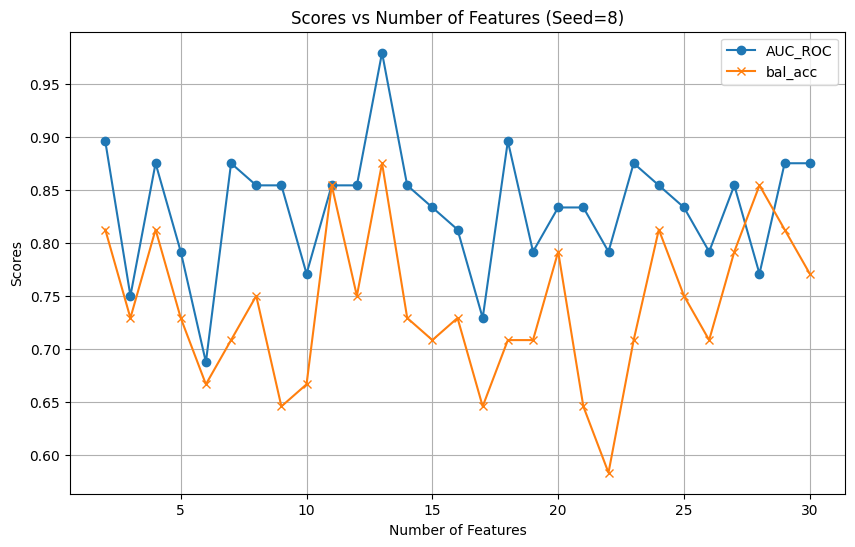

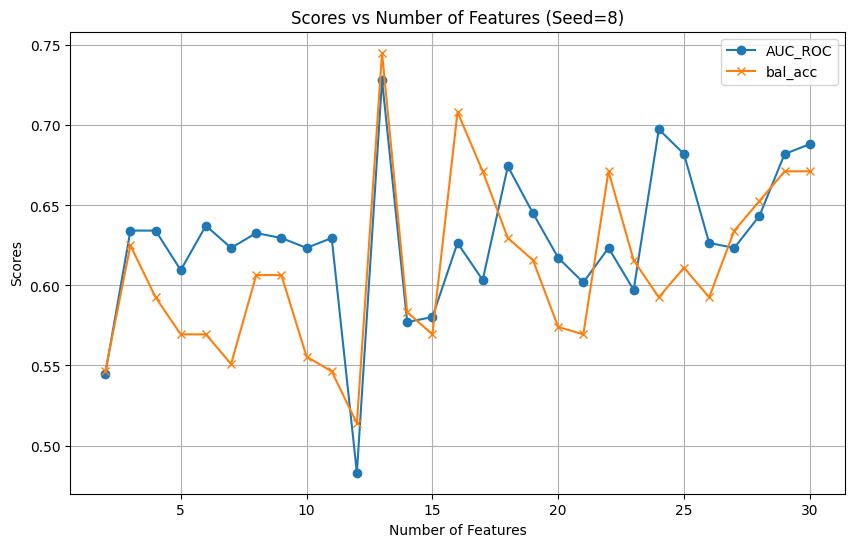

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming you have your DataFrame already loaded, let's say it's named df

# Filter the DataFrame for a specific seed, for example, seed=8
seed_3_df = insight_df_val[insight_df_val['seed'] == 3]

# Plotting AUC_ROC and bal_acc as functions of n features
plt.figure(figsize=(10, 6))
plt.plot(seed_3_df['n features'], seed_3_df['AUC_ROC'], label='AUC_ROC', marker='o')
plt.plot(seed_3_df['n features'], seed_3_df['bal_acc'], label='bal_acc', marker='x')
plt.xlabel('Number of Features')
plt.ylabel('Scores')
plt.title('Scores vs Number of Features (Seed=8)')
plt.legend()
plt.grid(True)
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame already loaded, let's say it's named df

# Filter the DataFrame for a specific seed, for example, seed=8
seed_3_df = insight_df_test[insight_df_test['seed'] == 3]

# Plotting AUC_ROC and bal_acc as functions of n features
plt.figure(figsize=(10, 6))
plt.plot(seed_3_df['n features'], seed_3_df['AUC_ROC'], label='AUC_ROC', marker='o')
plt.plot(seed_3_df['n features'], seed_3_df['bal_acc'], label='bal_acc', marker='x')
plt.xlabel('Number of Features')
plt.ylabel('Scores')
plt.title('Scores vs Number of Features (Seed=8)')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
features_mrmr

Index(['waveletHLH_glszm_SizeZoneNonUniformityNormalized',
       'waveletHLH_firstorder_Mean',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_shape_Elongation', 'waveletHHL_firstorder_Median',
       'waveletHHH_glrlm_GrayLevelNonUniformityNormalized',
       'waveletHHH_glszm_SizeZoneNonUniformityNormalized',
       'original_ngtdm_Busyness', 'original_shape_Flatness',
       'waveletHLL_ngtdm_Strength', 'waveletLHH_glcm_Correlation',
       'original_firstorder_Skewness', 'waveletLLH_firstorder_Mean',
       'original_shape_MajorAxisLength',
       'waveletLLH_glszm_SizeZoneNonUniformityNormalized',
       'waveletHHL_firstorder_Mean', 'waveletLLH_firstorder_Kurtosis',
       'waveletHLL_glrlm_LongRunHighGrayLevelEmphasis',
       'waveletHLH_gldm_SmallDependenceEmphasis',
       'waveletHLH_firstorder_Skewness', 'waveletHHH_glcm_Correlation',
       'original_glszm_SizeZoneNonUniformityNormalized',
       'original_glszm_GrayLevelNonUniformity',
       'wa

In [65]:
main_path = os.getcwd()
results_metrics = os.path.join(main_path,'mrmr_valtest15_09_XGB_val.csv')
results_metrics2 = os.path.join(main_path,'mrmr_valtest15_09_XGB_test.csv')

# save data
insight_df_val.to_csv(results_metrics, index=False)
insight_df_test.to_csv(results_metrics2, index=False)

In [66]:
main_path = os.getcwd()
results_metrics = os.path.join(main_path,'mrmr_ord_valtest15_09_XGB_val.csv')
results_metrics2 = os.path.join(main_path,'mrmr_ord_valtest15_09_XGB_test.csv')
# save data
ins_sort_val.to_csv(results_metrics, index=False)
ins_sort_test.to_csv(results_metrics2, index=False)

## application of the best model of the validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
insight_val = []
insight_test = []
rand_num = 3 
# Train - test splitting (80-20)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, shuffle=False, random_state=None, stratify=None)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.15, shuffle=True, random_state=rand_num, stratify=y_train1)

# Merging X and y for train and test set
data_train = pd.concat([(pd.DataFrame(X_train.reset_index(drop=True))),(pd.DataFrame(y_train.reset_index(drop=True)))], axis=1)
data_val = pd.concat([(pd.DataFrame(X_val.reset_index(drop=True))),(pd.DataFrame(y_val.reset_index(drop=True)))], axis=1)
data_test = pd.concat([(pd.DataFrame(X_test1.reset_index(drop=True))),(pd.DataFrame(y_test1.reset_index(drop=True)))], axis=1)

# Remove correlated features
data_train_nc, data_val_nc, data_test_nc, num_corr_features, correlated_features = remove_correlated_features(data_train, data_val, data_test, 0.90) # da provare con diversi threshold di correlazione tra 0.80 e 0.95

data_train=data_train_nc
data_val=data_val_nc
data_train_all=pd.concat([data_train_nc,data_val_nc], ignore_index=True)
data_test=data_test_nc

# Scaler1
scaler = StandardScaler()
scaled_train = scaler.fit_transform(data_train.iloc[:,:-1])
tmp_scaled_train = pd.DataFrame(scaled_train,columns = data_train.columns[:-1])
data_train_scaled = pd.concat([tmp_scaled_train,data_train.iloc[:,[-1]].reset_index(drop=True)], axis=1)

scaled_val = scaler.transform(data_val.iloc[:,:-1])
tmp_scaled_val = pd.DataFrame(scaled_val, columns=data_val.columns[:-1])
data_val_scaled = pd.concat([tmp_scaled_val, data_val.iloc[:,[-1]].reset_index(drop=True)], axis=1)

# Scaler2
scaler2 = StandardScaler()
scaled_train_all = scaler2.fit_transform(data_train_all.iloc[:,:-1])
tmp_scaled_train_all = pd.DataFrame(scaled_train_all,columns = data_train_all.columns[:-1])
data_train_scaled_all = pd.concat([tmp_scaled_train_all,data_train_all.iloc[:,[-1]].reset_index(drop=True)], axis=1)

scaled_test = scaler2.transform(data_test.iloc[:,:-1])
tmp_scaled_test = pd.DataFrame(scaled_test, columns=data_test.columns[:-1])
data_test_scaled = pd.concat([tmp_scaled_test, data_test.iloc[:,[-1]].reset_index(drop=True)], axis=1)

# Initialize lists to store AUC and Bal_Acc for each classifier
auc_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
            'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

bal_acc_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
                'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

f1_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
            'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

sensitivity_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
                'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

specificity_dict = {'Decision Tree': [], 'KNN': [], 'Logistic Regression': [], 'SVC': [],
                'MLP': [], 'Random Forest': [], 'AdaBoost': [], 'Naive Bayes': [], 'XGBoost': []}

num_feat = 13 
AUC_ROC = []
bal_acc = []
f1 = []                    

# Features selection: MRMR
data_train_mrmr, data_val_mrmr = mrmr_features_selection(data_train_scaled, data_val_scaled, num_feat) # Select number of features to get
data_test_mrmr = data_test_scaled.loc[:,data_train_mrmr.columns]
data_train_mrmr_all = data_train_scaled_all.loc[:,data_train_mrmr.columns]

features_mrmr = data_train_mrmr.columns[:-1]

# X-y dataset 
X_train_2 = data_train_mrmr.drop(['label'], axis=1)
X_val_2 = data_val_mrmr.drop(['label'], axis=1)
X_test_2 = data_test_mrmr.drop(['label'], axis=1)
X_train_all=data_train_mrmr_all.drop(['label'], axis=1)

y_train_2 = data_train_mrmr[['label']]
y_val_2 = data_val_mrmr[['label']]
y_test_2 = data_test_mrmr[['label']]
y_train_all = data_train_mrmr_all[['label']]

# Oversampling minority class using SMOTE technique
sm = SMOTE(sampling_strategy='minority',k_neighbors=1,random_state=42)
xtrain, ytrain = sm.fit_resample(X_train_2, y_train_2)
xval=X_val_2
yval=y_val_2.label
xtest=X_test_2
ytest=y_test_2.label
ytrain=ytrain.label
y_train_all=y_train_all.label
y_train_2=y_train_2.label

# Oversampling minority class using SMOTE technique
sm2 = SMOTE(sampling_strategy='minority',k_neighbors=1,random_state=42)
xtrain_all, ytrain_all = sm2.fit_resample(X_train_all, y_train_all)

# Collect AUC and Bal_Acc for each classifier
classifiers = [('XGB', xgb_classif)]
for classifier_name, classifier_func in classifiers:
    bal_acc_value_val, f1_value_val, sensitivity_value_val, specificity_value_val, auc_value_val, yval_mlp, ypred_val_mlp, prob_val_mlp,  ytrain1_mlp, ypred_train1_mlp, prob_mlp_train1 = classifier_func(xtrain, ytrain, xval, yval, X_train_2, y_train_2)
    bal_acc_value_test, f1_value_test, sensitivity_value_test, specificity_value_test, auc_value_test, ytest_mlp, ypred_mlp, prob_mlp,  ytrain_all_mlp, ypred_train_all_mlp, prob_mlp_train_all = classifier_func(xtrain_all, ytrain_all, xtest, ytest, X_train_all, y_train_all)

    insight_val.append([rand_num, num_feat, classifier_name, auc_value_val, bal_acc_value_val, f1_value_val, sensitivity_value_val, specificity_value_val])
    insight_test.append([rand_num, num_feat, classifier_name, auc_value_test, bal_acc_value_test, f1_value_test, sensitivity_value_test, specificity_value_test])


insight_df_val = pd.DataFrame(insight_val, columns=["seed", "n features", "Classifier", "AUC_ROC", "bal_acc", "f1_score", "sensitivity", "specificity"])
insight_df_test = pd.DataFrame(insight_test, columns=["seed", "n features", "Classifier", "AUC_ROC", "bal_acc", "f1_score", "sensitivity", "specificity"])

100%|██████████| 13/13 [00:00<00:00, 19.09it/s]


In [ ]:
prob_test_rad = pd.DataFrame({
    'Prob_rad': prob_mlp,
})

prob_test_rad.index=y_test1.index

main_path = os.getcwd()
prob_path = os.path.join(main_path,'prob_test_rad.csv')
# save data
prob_test_rad.to_csv(prob_path, index=True)

In [ ]:
prob_trainAll_rad = pd.DataFrame({
    'Prob_rad': prob_mlp_train_all,
})

prob_trainAll_rad.index=y_train1.index

main_path = os.getcwd()
prob_path = os.path.join(main_path,'prob_trainAll_rad.csv')
# save data
prob_trainAll_rad.to_csv(prob_path, index=True)

In [ ]:
prob_val_rad = pd.DataFrame({
    'Prob_rad': prob_val_mlp,
})

prob_val_rad.index=y_val.index

main_path = os.getcwd()
prob_path = os.path.join(main_path,'prob_val_rad.csv')
# save data
prob_val_rad.to_csv(prob_path, index=True)

In [ ]:
main_path = os.getcwd()
train_rad = os.path.join(main_path,'train_rad.csv')
# save data
data_train_mrmr_all.to_csv(train_rad, index=False)

In [ ]:
data_train_mrmr_all

,waveletHHH_gldm_SmallDependenceEmphasis,waveletLHH_firstorder_Mean,waveletHLL_glszm_LargeAreaHighGrayLevelEmphasis,waveletHLH_firstorder_Mean,waveletLHH_glcm_Correlation,original_ngtdm_Busyness,waveletHLH_glszm_SizeZoneNonUniformityNormalized,waveletHHL_firstorder_Median,waveletLLH_firstorder_Kurtosis,waveletHLH_firstorder_Skewness,waveletHLL_glrlm_LongRunHighGrayLevelEmphasis,original_shape_Flatness,waveletLHH_gldm_SmallDependenceEmphasis,label
0,0.050259,0.454664,-0.027769,0.259806,0.263042,-0.019172,-1.094249,-0.356426,-0.558622,0.133275,0.086216,0.381204,0.490534,1
1,-0.435778,-0.282480,-0.618515,0.205127,0.267172,0.335313,-1.174852,0.531086,-0.131460,1.942146,-0.646149,0.166047,-0.595779,0
2,0.314712,1.762423,-0.821226,0.683021,-0.599224,2.178306,0.604993,0.211026,-0.875159,-1.112193,-0.735559,1.694563,0.007907,0
3,-0.718099,-0.043189,-0.702031,-0.186361,1.717546,0.612838,-0.914329,0.575027,-0.385747,-1.435229,-0.709169,-0.382758,-1.524711,0
4,-0.965366,0.174928,-0.186002,-0.501513,1.215279,2.170799,-0.115288,0.069974,-0.538431,-0.005310,-0.515199,-0.107863,-1.249082,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-0.817043,-0.480388,-0.764781,-1.387513,-1.233673,-0.115259,-1.046106,-0.722159,-0.714197,-0.097116,-0.700308,-0.034522,1.109795,1
86,-0.928123,-0.361806,-0.835182,0.380382,2.723522,-0.297667,-0.958717,0.072915,-0.564931,1.976313,-0.812398,1.149668,-0.678851,1
87,0.597229,-0.351417,-0.385648,-0.446264,-0.570565,0.482436,0.170788,-1.398354,-0.036703,-0.662677,-0.135657,-0.025515,0.489702,0
88,-0.184106,-1.366979,2.334759,-0.574492,0.099646,-0.184571,-0.522293,0.434504,-0.083219,-0.203422,-0.076956,-0.386094,-0.452472,1


In [ ]:
ytest

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    1
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    1
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    1
33    1
34    0
35    0
36    1
37    0
38    1
Name: label, dtype: int64

In [ ]:
y_test1

IDs_new
patient_TC_128    0
patient_TC_129    1
patient_TC_133    0
patient_TC_135    0
patient_TC_136    0
patient_TC_137    0
patient_TC_138    0
patient_TC_139    0
patient_TC_141    1
patient_TC_142    1
patient_TC_144    1
patient_TC_146    0
patient_TC_147    0
patient_TC_149    1
patient_TC_150    0
patient_TC_153    0
patient_TC_155    1
patient_TC_158    0
patient_TC_159    0
patient_TC_161    0
patient_TC_163    0
patient_TC_166    0
patient_TC_168    1
patient_TC_169    1
patient_TC_170    0
patient_TC_171    0
patient_TC_175    0
patient_TC_176    0
patient_TC_178    0
patient_TC_182    0
patient_TC_183    0
patient_TC_188    0
patient_TC_189    1
patient_TC_190    1
patient_TC_193    0
patient_TC_197    0
patient_TC_199    1
patient_TC_200    0
patient_TC_205    1
Name: label, dtype: int64

In [ ]:
ypred_rad=pd.DataFrame(ypred_mlp, columns=['label'])
ypred_rad.index=y_test1.index

In [ ]:
main_path = os.getcwd()
y_pred_rad = os.path.join(main_path,'y_pred_rad.csv')
# save data
ypred_rad.to_csv(y_pred_rad, index=False)

              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80        27
         1.0       0.56      0.75      0.64        12

    accuracy                           0.74        39
   macro avg       0.72      0.75      0.72        39
weighted avg       0.78      0.74      0.75        39



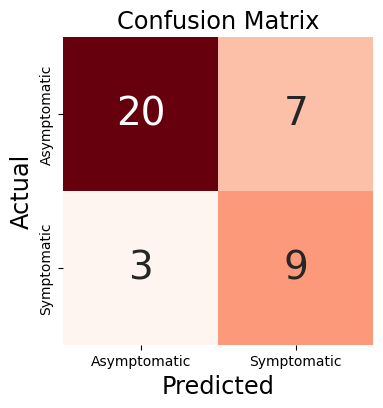

In [ ]:
# report
report_mlp  = classification_report(ytest_mlp, ypred_mlp)
print(report_mlp)

# Set labels for confusion matrix
labels = ['Asymptomatic', 'Symptomatic']

# Plot confusion matrix with seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(ytest_mlp, ypred_mlp), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels, annot_kws={"size": 28}, cbar=False)

# Set labels and title
plt.xlabel('Predicted', fontsize='xx-large')
plt.ylabel('Actual', fontsize='xx-large')
plt.title('Confusion Matrix', fontsize='xx-large')

# Display the plot
plt.show()

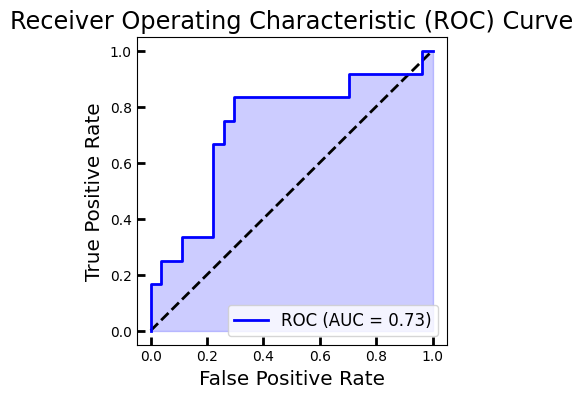

In [ ]:
# Compute ROC curve and ROC area for each class
fpr5,tpr5,threshold5=roc_curve(ytest_mlp,prob_mlp,pos_label=1)

# Plot ROC curve without the grid
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize='x-large')  # Adjust x-axis ticks as needed
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize='x-large')  # Adjust y-axis ticks as needed
ax.tick_params(which='both', direction='in', length=6, width=2, colors='black', grid_alpha=0)  # Show ticks, hide grid lines

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
auc = metrics.auc(fpr5, tpr5)
youden_j = tpr5 - fpr5

# Plot ROC curve with style
plt.plot(fpr5, tpr5, color='blue', linewidth=2, label='ROC (AUC = {:.2f})'.format(auc), alpha=1)
plt.fill_between(fpr5, tpr5, color='blue', alpha=0.2)

# Add labels and title
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize='xx-large')

# Add legend
plt.legend(loc='lower right',fontsize='large')

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score
bal_acc_mlp=balanced_accuracy_score(ytest_mlp,ypred_mlp)
print (bal_acc_mlp)

f1=f1_score(ytest_mlp,ypred_mlp)
print(f1)


sensitivity = recall_score(ytest_mlp,ypred_mlp)
print(sensitivity)
cm = confusion_matrix(ytest_mlp, ypred_mlp)
tn = cm[0, 0]
fp = cm[0, 1]
specificity = tn / (tn + fp)
print (specificity)

0.7453703703703703
0.6428571428571429
0.75
0.7407407407407407


In [ ]:
prob_val_mlp

array([0.6833042 , 0.6419422 , 0.8056332 , 0.21590902, 0.28149757,
       0.6708941 , 0.37606382, 0.2923006 , 0.3701405 , 0.67646134,
       0.6824471 , 0.6257516 , 0.71837723, 0.2923006 ], dtype=float32)

In [ ]:
prob_mlp

array([0.22616833, 0.18029083, 0.8145395 , 0.8732749 , 0.08639932,
       0.36459613, 0.26005012, 0.78852767, 0.04374236, 0.70163256,
       0.79814845, 0.7763213 , 0.08645957, 0.70773447, 0.08537894,
       0.03241691, 0.64508295, 0.17925784, 0.6011549 , 0.33252037,
       0.3478696 , 0.10123177, 0.5873075 , 0.68317187, 0.35269293,
       0.34117046, 0.3085226 , 0.18480186, 0.3419766 , 0.10671341,
       0.15127212, 0.3396824 , 0.9263681 , 0.95815164, 0.7374383 ,
       0.9343699 , 0.9605093 , 0.47536173, 0.3920457 ], dtype=float32)

In [ ]:
prob_test_rad

,Prob_rad
IDs_new,
patient_TC_128,0.226168
patient_TC_129,0.180291
patient_TC_133,0.814539
patient_TC_135,0.873275
patient_TC_136,0.086399
patient_TC_137,0.364596
patient_TC_138,0.260050
patient_TC_139,0.788528
patient_TC_141,0.043742
